Adapted by Carlos Toxtli https://www.carlostoxtli.com/#ranfor-3

Source: https://github.com/chengyin38/Random-Forest-Tutorial/blob/master/Random%20Forest.ipynb

In [ ]:
!git clone https://github.com/chengyin38/Random-Forest-Tutorial.git
%cd Random-Forest-Tutorial

Cloning into 'Random-Forest-Tutorial'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 3), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (16/16), done.
/content/Random-Forest-Tutorial


In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
# Defining data folder
data_folder = os.path.join(os.getcwd(), 'steak-survey')

# Read data
df = pd.read_csv(os.path.join(data_folder, 'steak-risk-survey.csv'))
df_original = df

Here is the link to a really fun article about this data set. Check it out! 

# Exploring data

In [ ]:
df.head()

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England


In [ ]:
# Dropping the first two rows, since they are not informative
df = df.drop(df.index[[0,1]])

In [ ]:
df.shape

(549, 15)

In [ ]:
df.dtypes

RespondentID                                                                                                                                                                                                                                                                         float64
Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?     object
Do you ever smoke cigarettes?                                                                                                                                                                                                                                                         object
Do you ever drink alcohol?                                                                                                                       

# Cleaning the data

In [ ]:
# replace missing values with mode for all categorical columns
for col in df.columns:
    df[col] = df[[col]].fillna(value=df[col].value_counts().index[0])

In [ ]:
df.iloc[:,1].head()

2    Lottery A
3    Lottery A
4    Lottery B
5    Lottery B
6    Lottery A
Name: Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?, dtype: object

In [ ]:
# create a new column for target 
df['risk_target'] = np.where(df.iloc[:,1] == "Lottery A", 1, 0) # 1 is riskier, 2 is safer

In [ ]:
df.head()

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region),risk_target
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central,1
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic,1
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England,0
5,3.234959e+09,Lottery B,No,Yes,No,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic,0
6,3.234955e+09,Lottery A,No,No,No,No,Yes,No,Yes,Medium rare,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central,1


In [ ]:
# replace values in column based on another column
df.loc[df['Do you eat steak?'] == 'No', 'How do you like your steak prepared?'] = "Irrelevant"

In [ ]:
df.head()

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region),risk_target
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central,1
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic,1
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England,0
5,3.234959e+09,Lottery B,No,Yes,No,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Graduate degree,Middle Atlantic,0
6,3.234955e+09,Lottery A,No,No,No,No,Yes,No,Yes,Medium rare,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central,1


# Create training data and testing data

In [ ]:
# 3rdd column onwards, excluding the last column
X = df.iloc[:,2:-1]

In [ ]:
X.columns

Index(['Do you ever smoke cigarettes?', 'Do you ever drink alcohol?',
       'Do you ever gamble?', 'Have you ever been skydiving?',
       'Do you ever drive above the speed limit?',
       'Have you ever cheated on your significant other?', 'Do you eat steak?',
       'How do you like your steak prepared?', 'Gender', 'Age',
       'Household Income', 'Education', 'Location (Census Region)'],
      dtype='object')

## one-hot encoding

For sklearn's random forest implementation, it is necesary to do one-hot encoding for all categorical columns so that each column is a binary column. 

Hint: use `pd.get_dummies`

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,Do you ever smoke cigarettes?_No,Do you ever smoke cigarettes?_Yes,Do you ever drink alcohol?_No,Do you ever drink alcohol?_Yes,Do you ever gamble?_No,Do you ever gamble?_Yes,Have you ever been skydiving?_No,Have you ever been skydiving?_Yes,Do you ever drive above the speed limit?_No,Do you ever drive above the speed limit?_Yes,Have you ever cheated on your significant other?_No,Have you ever cheated on your significant other?_Yes,Do you eat steak?_No,Do you eat steak?_Yes,How do you like your steak prepared?_Irrelevant,How do you like your steak prepared?_Medium,How do you like your steak prepared?_Medium Well,How do you like your steak prepared?_Medium rare,How do you like your steak prepared?_Rare,How do you like your steak prepared?_Well,Gender_Female,Gender_Male,Age_18-29,Age_30-44,Age_45-60,Age_> 60,"Household Income_$0 - $24,999","Household Income_$100,000 - $149,999","Household Income_$150,000+","Household Income_$25,000 - $49,999","Household Income_$50,000 - $99,999",Education_Bachelor degree,Education_Graduate degree,Education_High school degree,Education_Less than high school degree,Education_Some college or Associate degree,Location (Census Region)_East North Central,Location (Census Region)_East South Central,Location (Census Region)_Middle Atlantic,Location (Census Region)_Mountain,Location (Census Region)_New England,Location (Census Region)_Pacific,Location (Census Region)_South Atlantic,Location (Census Region)_West North Central,Location (Census Region)_West South Central
2,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
X.dtypes

Do you ever smoke cigarettes?_No                        uint8
Do you ever smoke cigarettes?_Yes                       uint8
Do you ever drink alcohol?_No                           uint8
Do you ever drink alcohol?_Yes                          uint8
Do you ever gamble?_No                                  uint8
Do you ever gamble?_Yes                                 uint8
Have you ever been skydiving?_No                        uint8
Have you ever been skydiving?_Yes                       uint8
Do you ever drive above the speed limit?_No             uint8
Do you ever drive above the speed limit?_Yes            uint8
Have you ever cheated on your significant other?_No     uint8
Have you ever cheated on your significant other?_Yes    uint8
Do you eat steak?_No                                    uint8
Do you eat steak?_Yes                                   uint8
How do you like your steak prepared?_Irrelevant         uint8
How do you like your steak prepared?_Medium             uint8
How do y

In [ ]:
X.shape

(549, 45)

In [ ]:
y = df.iloc[:,-1]

In [ ]:
y.head()

2    1
3    1
4    0
5    0
6    1
Name: risk_target, dtype: int64

In [ ]:
df['risk_target'].value_counts()

0    282
1    267
Name: risk_target, dtype: int64

### data set is not imbalanced -- great!

# Training model, step 1: splitting data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)  

In [ ]:
y_train.head()

175    1
494    0
249    1
85     1
290    1
Name: risk_target, dtype: int64

# Training model, step 2: build the model

Now, build a random forest classifier from the sklearn module. <br/>
<href>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</href>

Hint: `from sklearn.ensemble import RandomForestClassifier`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10,
                               max_depth=10,
                               min_samples_leaf = 30,
                               max_features="auto",
                               bootstrap=True)

# Fitting / Training the model

Call fit to the model to train the model! 

In [ ]:
model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_train.head()

175    1
494    0
249    1
85     1
290    1
Name: risk_target, dtype: int64

# Visualize Trees

We can even visualize the decision trees that are within the random forest we just built! Use `model.estimators_`.

In [ ]:
# Extract single tree
estimator = model.estimators_[5]
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=27417921, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(
    estimator,
    out_file='tree.dot', 
    feature_names=X.columns,
    filled=True,
    rounded=True,
    proportion=False,
    precision=2)

In [ ]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

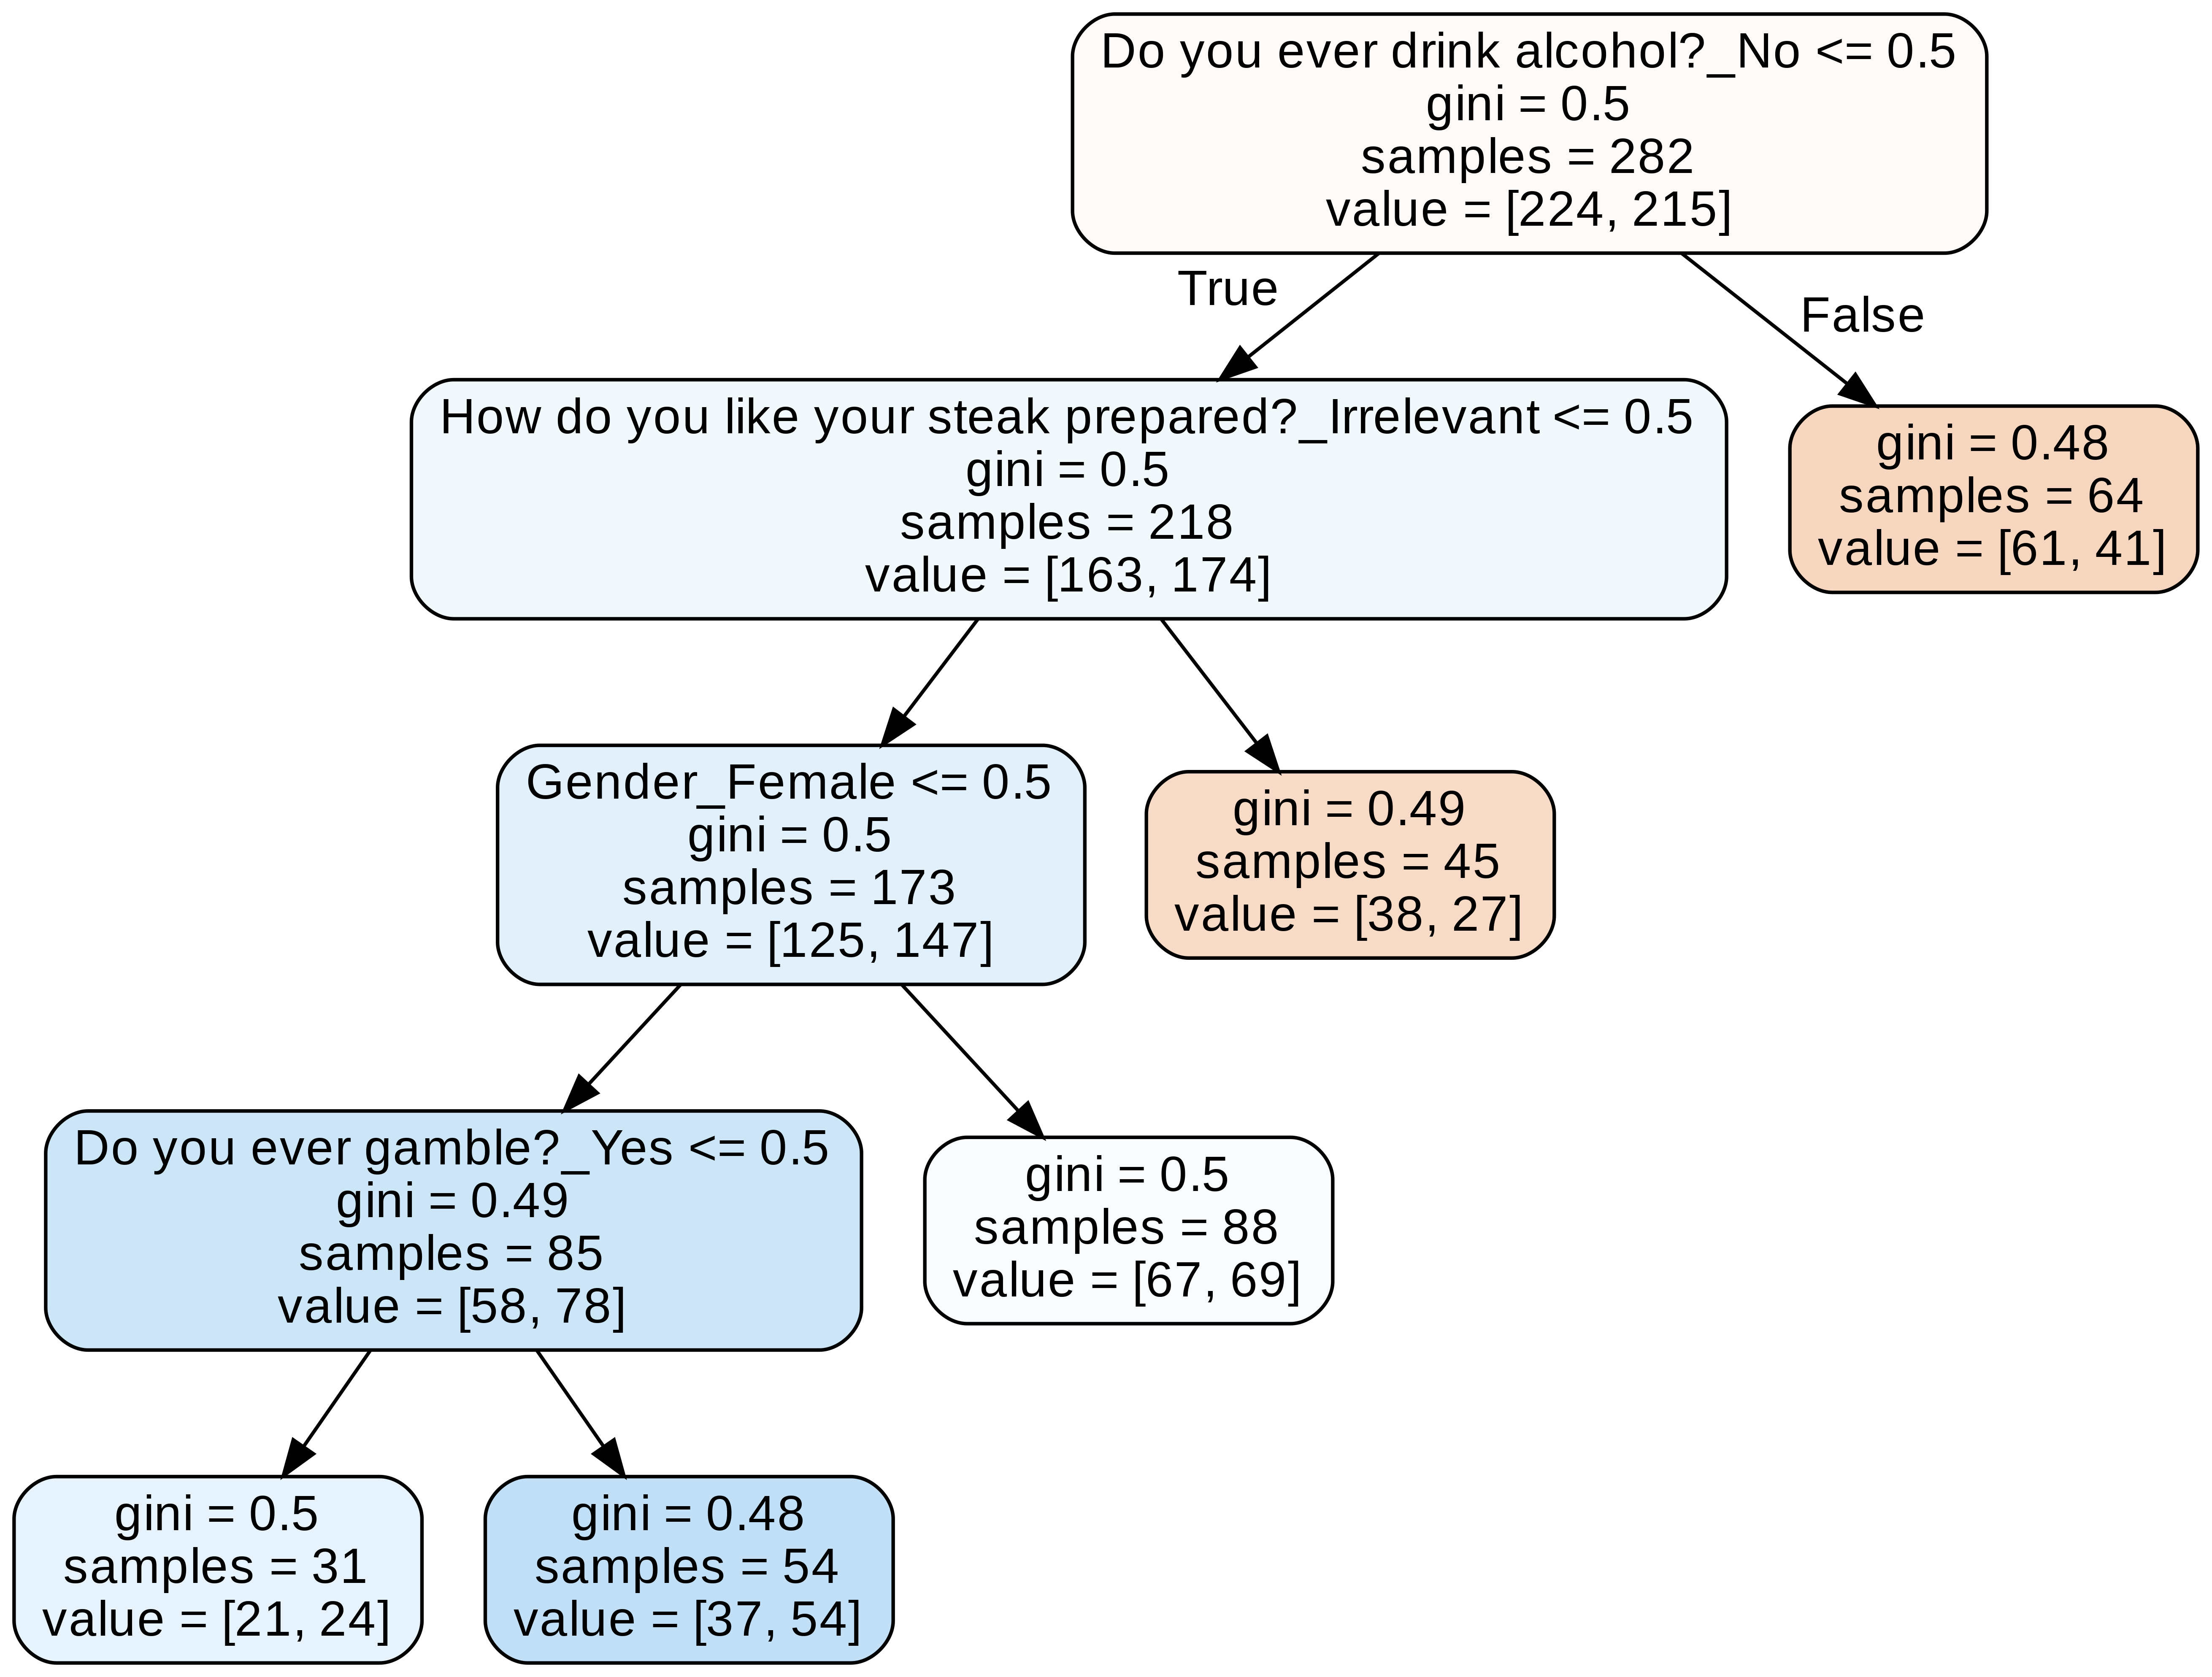

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Predict the model on the test set

You can use `model.predict` to make predictions on the test set. 

In [ ]:
predicted = model.predict(X_test)

Let's inspect the array of predicted values to make sure the target is sensible!

In [ ]:
predicted

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0])

## Get probabilities for each target

We can also obtain probabilities of each target by calling ` model.predict_proba`. Try it!

Do the probabilities tally with the binary predictions?

In [ ]:
rf_probs = model.predict_proba(X_test)[:,1]

In [ ]:
rf_probs

array([0.40781521, 0.55574013, 0.42909894, 0.42948045, 0.47646057,
       0.50917427, 0.56835929, 0.52506288, 0.43815484, 0.43688105,
       0.40967474, 0.43674529, 0.54627321, 0.5613777 , 0.51891911,
       0.52357228, 0.53784716, 0.47940028, 0.52006369, 0.44253805,
       0.44626318, 0.52357228, 0.52643668, 0.43970474, 0.38154845,
       0.56497077, 0.53556457, 0.45322483, 0.51694602, 0.53715618,
       0.45548537, 0.46993484, 0.43010976, 0.41238679, 0.45081474,
       0.43936399, 0.44375729, 0.4790923 , 0.53982244, 0.56368344,
       0.44132889, 0.45693213, 0.44377757, 0.55388457, 0.4651514 ,
       0.45426657, 0.44331826, 0.45220363, 0.51587057, 0.53160733,
       0.52221803, 0.4206954 , 0.54260872, 0.53108642, 0.57208167,
       0.43673792, 0.41725799, 0.51915592, 0.44293752, 0.51624193,
       0.55921666, 0.53453006, 0.55500471, 0.39208774, 0.45484134,
       0.41477238, 0.48968239, 0.38154845, 0.40588962, 0.40389411,
       0.49921562, 0.5312436 , 0.53176171, 0.52553513, 0.51334

# Evaluating the model 

## AUC

A common metric used to evalute classification models is AUC (Area Under Curve) score. There are also other types of evalution metrics for classification, refer <a href = "https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b">to this article</a>.

Now use `from sklearn.metrics import roc_auc_score` to calculate the AUC score for our model. You can refer to the official documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html">here</a>. Below is an image of an example ROC curve. <br/>
<img src="https://github.com/chengyin38/Random-Forest-Tutorial/blob/master/images/ROC%20plot.png?raw=1" style="width: 500px;">

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs) # y-test is the true score, rf_probs is the predicted score

In [ ]:
print(roc_value)

0.5911044973544972


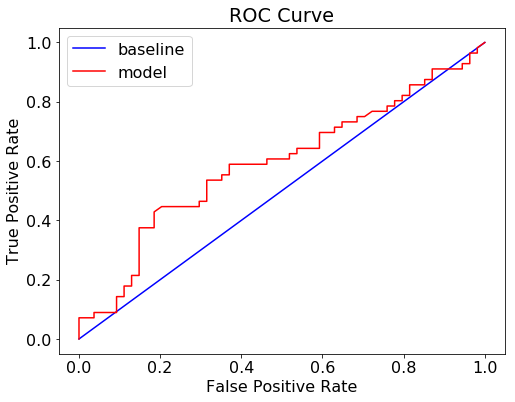

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate false positive rates and true positive rates
base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
model_fpr, model_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16

# Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr, model_tpr, 'r', label = 'model')
plt.legend();
plt.xlabel('False Positive Rate'); 
plt.ylabel('True Positive Rate'); 
plt.title('ROC Curve');

## Accuracy

Now, let's compare the training and testing accuracies using `model.score()`. If training accuracy is higher than testing accuracy, the model overfits. 

In [ ]:
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.56
Accuracy of RF classifier on test set: 0.60


# Feature Importance

We can also take a look at feature importance of the random forest model. You can use `model.feature_importances_`. 

Here is a list of the features that contribute most to predicting whether someone is likely to avoid or take risks!

In [ ]:
pd.set_option("display.max_colwidth",100) # increase column width so that you'd read everything

In [ ]:
# Extract feature importance from the model
fi = pd.DataFrame({
    'feature': list(X.columns),
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Display
fi

,feature,importance
4,Do you ever gamble?_No,0.232308
14,How do you like your steak prepared?_Irrelevant,0.128971
15,How do you like your steak prepared?_Medium,0.127196
3,Do you ever drink alcohol?_Yes,0.093849
2,Do you ever drink alcohol?_No,0.057401
27,"Household Income_$100,000 - $149,999",0.055907
11,Have you ever cheated on your significant other?_Yes,0.043391
5,Do you ever gamble?_Yes,0.041281
24,Age_45-60,0.039960
32,Education_Graduate degree,0.033651


# Gini Impurity

Gini Impurity is the <b>probability of incorrectly classifying a randomly chosen element</b> in the dataset if it were randomly labeled according to the class distribution in the dataset. What’s the probability we classify the datapoint incorrectly? The answer to that question is the Gini Impurity. A Gini Impurity of 0 is the lowest and best possible impurity. It can only be achieved when everything is the same class (e.g. only blues or only greens). When training a decision tree, the best split is chosen by maximizing the Gini Gain, which is calculated by subtracting the weighted impurities of the branches from the original impurity. <br/>

Higher Gini Gain = Better Split. Eventually, the average Gini Impurity goes to 0.0 as we correctly classify each point. However, <b>_correctly classifying every single training point is usually not a good indicator</b>_ because that means the model will not be able to generalize to the testing data! Read <a href="https://victorzhou.com/blog/gini-impurity/">this article</a> for more detail.

For Gini Impurity
<img src="https://github.com/chengyin38/Random-Forest-Tutorial/blob/master/images/gini_equation.png?raw=1" style="width: 200px;"> <br/>


For Gini Gain
<img src="https://github.com/chengyin38/Random-Forest-Tutorial/blob/master/images/gini.png?raw=1" style="width: 200px;"> <br/>

<img src="https://github.com/chengyin38/Random-Forest-Tutorial/blob/master/images/gini2.jpg?raw=1" style="width: 500px;">

# Extra: Grid search

If you want to improve your model, you can define a hyperparameter grid and search for the best hyperparameter combination using `sklearn.model_selection.GridSearchCV`, like below:

`param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}`
              
And you can pass the object `param_dist` into the `GridSearchCV` object as an argument for `param_grid`. You can also choose the number of cross validations you desire; usually 5-10 cross validations are sufficient. Numbers beyond 10 do not yield significant improvement from research.

`cv_rf = GridSearchCV(model, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)`

Make another call to train the model again! 

`cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n',
      cv_rf.best_params_)``